In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import numpy as np
from poitousprint import Portic
portic_client = Portic()

In [2]:
#pointcalls = portic_client.get_pointcalls(year=1789, source_subset="Poitou_1789")

In [3]:
#len(pointcalls)

In [4]:
sorties = pd.read_csv("sorties_navires_vers_etranger.csv")

In [5]:
len(sorties)

367

In [6]:
sorties.ship_flag_standardized_fr.value_counts()

britannique             123
danois                   54
français                 53
hollandais               45
étasunien                25
prussien                 22
lubeckois                 8
hambourgeois              7
polonais                  7
brémois                   5
meckelmbourgeois          4
Espagne, undeterminé      3
oldenbourgeois            2
papenbourgeois            1
Name: ship_flag_standardized_fr, dtype: int64

In [7]:
sorties.homeport_state_1789_fr.value_counts()

Grande-Bretagne          118
France                    54
Danemark                  52
Provinces-Unies           37
Etats-Unis d'Amérique     23
Prusse                    20
Lubeck                     8
Pologne                    7
Hambourg                   7
Brême                      5
Espagne                    3
Mecklenbourg               2
Duché d'Oldenbourg         2
Duché de Mecklenbourg      1
Name: homeport_state_1789_fr, dtype: int64

In [8]:
len(sorties[sorties.homeport_state_1789_fr.isna()])

28

In [9]:
sorties[sorties.homeport_state_1789_fr.isna()].sample(5)

,port_depart,outdate_fixed,port_destination,substate_destination,homeport_state_1789_fr,homeport_toponyme_fr,homeport_province,commodity_standardized_fr,commodity_standardized2_fr,commodity_standardized3_fr,commodity_standardized4_fr,taxe_amount01,taxe_amount02,taxe_amount03,tonnage,tonnage_unit,tonnage_class,ship_flag_standardized_fr
363,Saint-Martin-de-Ré,1789-06-26,Biscaye,NaN,NaN,pas identifié,NaN,Sel,NaN,NaN,NaN,1 800,0,0,45.0,tx,[21-50],NaN
130,Ars-en-Ré,1789-05-20,Amsterdam,Hollande,NaN,NaN,NaN,Sel,NaN,NaN,NaN,480,0,0,80.0,tx,[51-100],hollandais
260,Noirmoutier,1789-07-07,Königsberg / Kaliningrad,NaN,NaN,NaN,NaN,Sel,NaN,NaN,NaN,480,0,0,150.0,tx,[101-200],prussien
353,Noirmoutier,1789-07-27,Mer Baltique,NaN,NaN,NaN,NaN,Sel,NaN,NaN,NaN,480,0,0,200.0,tx,[101-200],prussien
306,Noirmoutier,1789-07-08,Mer Baltique,NaN,NaN,NaN,NaN,Sel,NaN,NaN,NaN,480,0,0,120.0,tx,[101-200],NaN


In [10]:
flag_to_homestate = {"britannique": "Grande-Bretagne",
                    "français": "France",
                     "danois": "Danemark",
                     "hollandais": "Provinces-Unies",
                     "étasunien": "Etats-Unis d'Amérique",
                     "prussien": "Prusse",
                     "lubeckois": "Lubeck",
                     "polonais": "Pologne",
                     "hambourgeois": "Hambourg",
                     "brémois": "Brême",
                     "meckelmbourgeois": "Mecklenbourg",
                     "oldenbourgeois": "Duché d'Oldenbourg",
                     "papenbourgeois": "Prusse"
                    }

In [11]:
sorties[sorties.homeport_state_1789_fr.isna()][["homeport_state_1789_fr", "ship_flag_standardized_fr"]].sample(5)

,homeport_state_1789_fr,ship_flag_standardized_fr
290,NaN,NaN
306,NaN,NaN
38,NaN,britannique
112,NaN,hollandais
296,NaN,meckelmbourgeois


In [12]:
sorties["flag"] = sorties.ship_flag_standardized_fr.map(flag_to_homestate)

In [13]:
sorties[["homeport_state_1789_fr", "ship_flag_standardized_fr", "flag"]].sample(5)

,homeport_state_1789_fr,ship_flag_standardized_fr,flag
35,Grande-Bretagne,britannique,Grande-Bretagne
89,Grande-Bretagne,britannique,Grande-Bretagne
17,Grande-Bretagne,britannique,Grande-Bretagne
261,Hambourg,hambourgeois,Hambourg
143,France,français,France


In [14]:
sorties["homeport_state_1789_fr"] = sorties["homeport_state_1789_fr"].fillna(sorties.flag)
sorties["homeport_state_1789_fr"] = sorties["homeport_state_1789_fr"].fillna("Non renseigné")

In [15]:
sorties.homeport_state_1789_fr.value_counts()

Grande-Bretagne          123
Danemark                  54
France                    54
Provinces-Unies           44
Etats-Unis d'Amérique     25
Prusse                    23
Lubeck                     8
Non renseigné              8
Pologne                    7
Hambourg                   7
Brême                      5
Mecklenbourg               3
Espagne                    3
Duché d'Oldenbourg         2
Duché de Mecklenbourg      1
Name: homeport_state_1789_fr, dtype: int64

In [16]:
sorties["destination"] = sorties.substate_destination.fillna(sorties.homeport_state_1789_fr)

In [17]:
sorties

,port_depart,outdate_fixed,port_destination,substate_destination,homeport_state_1789_fr,homeport_toponyme_fr,homeport_province,commodity_standardized_fr,commodity_standardized2_fr,commodity_standardized3_fr,commodity_standardized4_fr,taxe_amount01,taxe_amount02,taxe_amount03,tonnage,tonnage_unit,tonnage_class,ship_flag_standardized_fr,flag,destination
0,Rochefort,1789-11-26,Hull,Angleterre,Grande-Bretagne,Hull,NaN,Eau-de-vie,Graines de lin,Graines de lin,Graines de lin,480,0,0,153.0,tx,[101-200],britannique,Grande-Bretagne,Angleterre
1,Tonnay-Charente,1789-07-14,Londres,Angleterre,Grande-Bretagne,Londres,NaN,NaN,NaN,NaN,NaN,480,0,0,133.0,tx,[101-200],britannique,Grande-Bretagne,Angleterre
2,Ars-en-Ré,1789-06-19,Berwick,Angleterre,Grande-Bretagne,Leith,NaN,Sel,NaN,NaN,NaN,480,0,0,65.0,tx,[51-100],britannique,Grande-Bretagne,Angleterre
3,Ars-en-Ré,1789-02-14,Bideford,Angleterre,Grande-Bretagne,Bideford,NaN,Sel,NaN,NaN,NaN,480,0,0,150.0,tx,[101-200],britannique,Grande-Bretagne,Angleterre
4,Ars-en-Ré,1789-04-21,Bideford,Angleterre,Grande-Bretagne,Bideford,NaN,Sel,NaN,NaN,NaN,480,0,0,113.0,tx,[101-200],britannique,Grande-Bretagne,Angleterre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,Marennes,1789-05-09,Bilbao,NaN,Espagne,Plencia,NaN,Sel,NaN,NaN,NaN,1 800,0,0,35.0,tx,[21-50],"Espagne, undeterminé",NaN,Espagne
363,Saint-Martin-de-Ré,1789-06-26,Biscaye,NaN,Non renseigné,pas identifié,NaN,Sel,NaN,NaN,NaN,1 800,0,0,45.0,tx,[21-50],NaN,NaN,Non renseigné
364,Saint-Martin-de-Ré,1789-08-07,Santander,NaN,France,Honfleur,Normandie,Lest,NaN,NaN,NaN,1 800,0,0,108.0,tx,[101-200],français,France,France
365,Saint-Martin-de-Ré,1789-04-06,Hambourg,NaN,Provinces-Unies,Hollande,NaN,Eau-de-vie,NaN,NaN,NaN,480,0,0,186.0,tx,[101-200],hollandais,Provinces-Unies,Provinces-Unies


In [18]:
sorties.destination.value_counts()

Angleterre                          91
Norvège                             51
Hollande                            34
Prusse                              21
France                              20
Massachussets                       16
Pays-Bas autrichiens                16
Provinces-Unies                     12
colonies françaises d'Amérique      10
Lubeck                               8
Irlande                              7
Pologne                              7
Hambourg                             7
Iles anglo-normandes                 6
Non renseigné                        6
Grande-Bretagne                      6
Brême                                5
Frise                                5
Maryland                             4
Ecosse                               4
Danemark                             4
Espagne                              3
Mecklenbourg                         3
Etats-Unis d'Amérique                2
colonies britanniques d'Amérique     2
Duché d'Oldenbourg       

In [19]:
sorties.homeport_state_1789_fr.value_counts()

Grande-Bretagne          123
Danemark                  54
France                    54
Provinces-Unies           44
Etats-Unis d'Amérique     25
Prusse                    23
Lubeck                     8
Non renseigné              8
Pologne                    7
Hambourg                   7
Brême                      5
Mecklenbourg               3
Espagne                    3
Duché d'Oldenbourg         2
Duché de Mecklenbourg      1
Name: homeport_state_1789_fr, dtype: int64

In [20]:
sorties.homeport_province.value_counts()

Aunis        31
Bretagne      9
Normandie     6
Guyenne       3
Saintonge     3
Poitou        1
Picardie      1
Name: homeport_province, dtype: int64

In [21]:
sorties["outside_DFLR"] = (
    (sorties["homeport_state_1789_fr"] != "France") | 
    (~sorties["homeport_province"].isin(["Aunis", "Poitou", "Saintonge"])))

In [22]:
sorties[["homeport_state_1789_fr", "homeport_province", "outside_DFLR", "destination"]].sample(30)

,homeport_state_1789_fr,homeport_province,outside_DFLR,destination
13,Grande-Bretagne,NaN,True,Angleterre
287,Lubeck,NaN,True,Lubeck
80,Grande-Bretagne,NaN,True,Angleterre
47,Grande-Bretagne,NaN,True,Angleterre
236,Provinces-Unies,NaN,True,Pays-Bas autrichiens
200,Danemark,NaN,True,Norvège
207,Danemark,NaN,True,Norvège
42,Grande-Bretagne,NaN,True,Angleterre
5,Grande-Bretagne,NaN,True,Angleterre
181,Etats-Unis d'Amérique,NaN,True,Massachussets


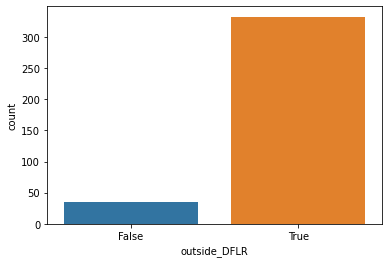

In [23]:
ax = sns.countplot(x="outside_DFLR", data=sorties)

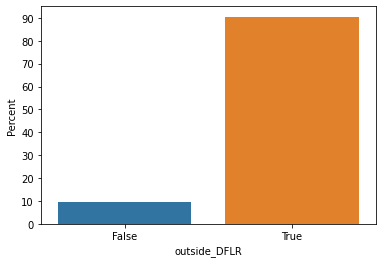

In [24]:
ax = sns.barplot(x="outside_DFLR", y="outside_DFLR", data=sorties, estimator=lambda x: len(x) / len(sorties) * 100)
ax.set(ylabel="Percent")
plt.yticks(np.arange(0, 100, 10))
plt.show()

In [25]:
noDFLR = sorties[(sorties.outside_DFLR == True)]

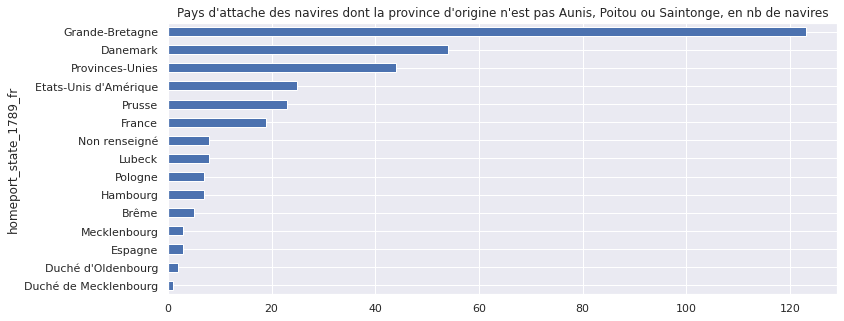

In [45]:
nb_pointcalls = noDFLR.groupby("homeport_state_1789_fr").size()
nb_pointcalls.sort_values().plot.barh()
plt.title(
    "Pays d'attache des navires dont la province d'origine n'est pas Aunis, Poitou ou Saintonge, en nb de navires")
plt.show()

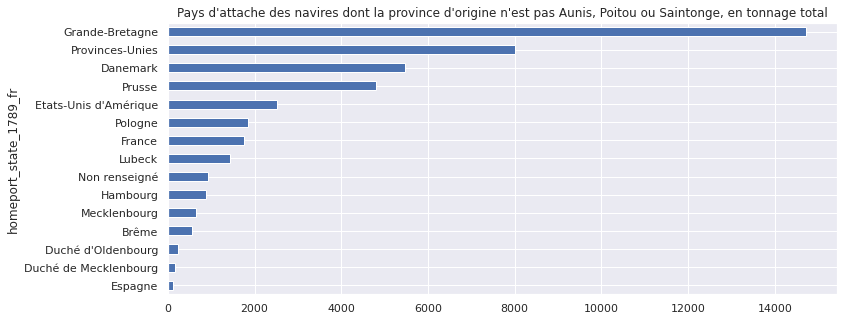

In [44]:
tonnage = noDFLR.groupby("homeport_state_1789_fr")["tonnage"].sum()
tonnage.sort_values().plot.barh()
plt.title(
    "Pays d'attache des navires dont la province d'origine n'est pas Aunis, Poitou ou Saintonge, en tonnage total")
plt.show()

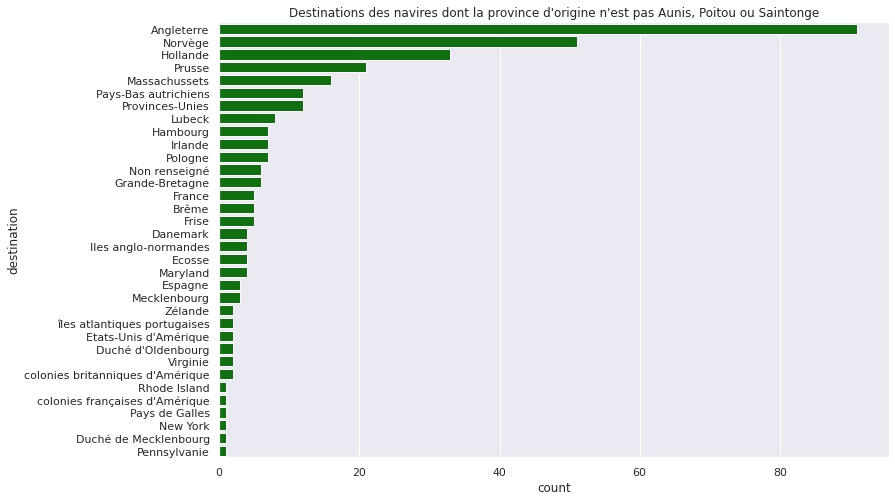

In [26]:
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.countplot(
    y="destination", 
    data=noDFLR,
    order=noDFLR.destination.value_counts().index, 
    orient="h", 
    color="green")
plt.title("Destinations des navires dont la province d'origine n'est pas Aunis, Poitou ou Saintonge")
plt.show()

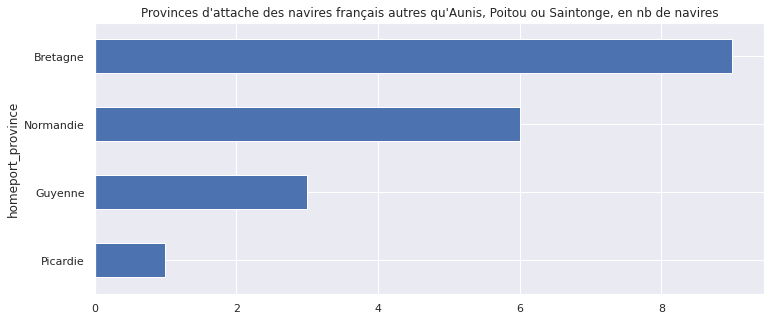

In [41]:
"""
sns.set(rc={'figure.figsize':(12,5)})
ax = sns.countplot(
    y="homeport_province", 
    data=noDFLR[(noDFLR.homeport_state_1789_fr == "France")], 
    order=noDFLR[(noDFLR.homeport_state_1789_fr == "France")].homeport_province.value_counts().index,
    color="green"
)
"""
fr = noDFLR[(noDFLR.homeport_state_1789_fr == "France")].groupby("homeport_province").size()
fr.sort_values().plot.barh()
plt.title("Provinces d'attache des navires français autres qu'Aunis, Poitou ou Saintonge, en nb de navires")
plt.show()

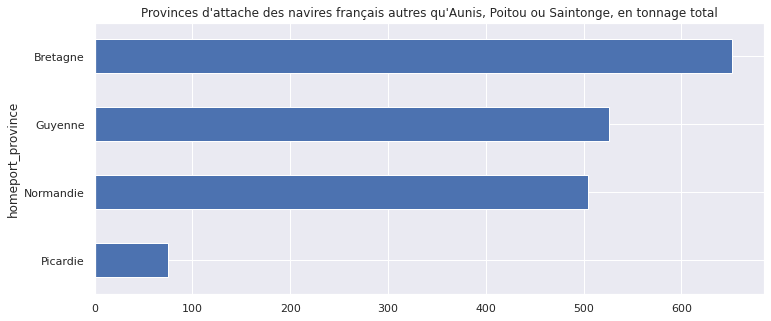

In [43]:
fr = noDFLR[(noDFLR.homeport_state_1789_fr == "France")].groupby("homeport_province")["tonnage"].sum()
fr.sort_values().plot.barh()
plt.title("Provinces d'attache des navires français autres qu'Aunis, Poitou ou Saintonge, en tonnage total")
plt.show()

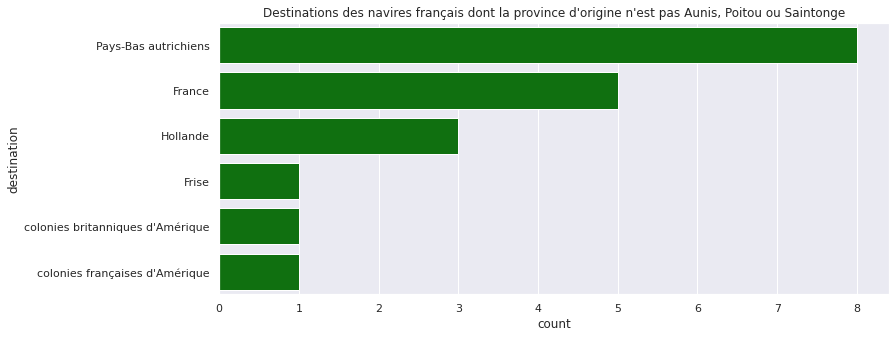

In [30]:
sns.set(rc={'figure.figsize':(12,5)})
ax = sns.countplot(
    y="destination", 
    data=noDFLR[(noDFLR.homeport_state_1789_fr == "France")], 
    order=noDFLR[(noDFLR.homeport_state_1789_fr == "France")].destination.value_counts().index,
    color="green"
)
plt.title("Destinations des navires français dont la province d'origine n'est pas Aunis, Poitou ou Saintonge")
plt.show()